April 2015, J. Slavič in L. Knez

Vprašanje 1: V simbolni obliki definirajte izraz:
$$f(x) = x^4 - 6.4\,x^3 + 6.45\,x^2 + 20.538\,x - 31.752$$

In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt

In [2]:
x = symbols('x')
f = x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
f

Vprašanje 2: Narišite funkcijo $f(x)$. Koliko ničel pričakujemo za funkcijo $f(x)$?

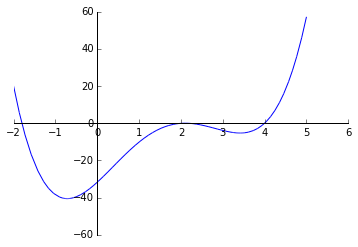

In [3]:
%matplotlib inline
plot(f, (x, -2, 5));

Glede na sliko pričakujemo 3 ničle.

Vprašanje 3: V simbolni obliki določite ničle polinoma $f(x)$.

In [4]:
sol = solve(f, x)
sol

Preverimo, če so rešitve ustrezne. Če x-e vstavimo v funkcijo, potem mora biti njena vrednost enaka 0.

In [5]:
[f.subs({x: _}).evalf() for _ in sol]

Vprašanje 4: Kako preverimo ali je ničla ekstrem?

Ekstreme funkcije je točka, kjer funkcija doseže minimum ali pa maksimum. Posledično je tangenta na premico v tej točki vodoravna (njen odvod je enak 0).

In [6]:
[f.diff(x).subs({x: _}).evalf() for _ in sol]

Vidimo, da je druga ničla ekstrem.

Vprašanje 5: Numerično najdite vse ničle z bisekcijsko metodo (uporabite ``scipy``).

In [8]:
from scipy import optimize   # Uvozimo vse metode za iskanje ničel

In [9]:
def f(x):   # Pripravimo funkcijo, ki jo bomo uporabili za numerični izračun
    return x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752

In [10]:
optimize.bisect(f, -2, 5, xtol=1e-3)  

ValueError: f(a) and f(b) must have different signs

Kot vidimo, nam bisekcijska metoda javi napako. Predznak funkcije je namreč enak pri f(-2) in pri f(5). Zmanjšajmo interval iskanja in poiščimo vsako ničlo posebej. Intervale iskanja določimo na podlagi izrisane funkcije.

In [10]:
b0_1 = optimize.bisect(f, -2, 1, xtol=1e-3) 
b0_1

In [11]:
b0_2 = optimize.bisect(f, 1, 3, xtol=1e-3)   # Ta je problematična, saj je predznak funkcije na obeh straneh isti
b0_2

ValueError: f(a) and f(b) must have different signs

In [12]:
b0_3 = optimize.bisect(f, 3, 5, xtol=1e-3)
b0_3

Vidimo, da smo z bisekcijsko metodo uspešno lahko poiskali le dve ničli.

Vprašanje 6: Numerično najdite vse ničle z sekantno metodo (uporabite ``scipy``).

Katero ničlo bo metoda vrnila je odvisno od začetnega približka. Metoda navadno konvertira k najbližji ničli (ni pa to vedno nujno).

In [14]:
prva_nicla = optimize.newton(f, -2)
prva_nicla

In [15]:
druga_nicla = optimize.newton(f, 1)
druga_nicla

In [16]:
druga_nicla = optimize.newton(f, 3.5)   # Poskusite tu z začetnim približkom 3
druga_nicla